In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")



In [2]:
df=pd.read_csv('dataset.csv')
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [3]:
df.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [8]:
df_new=df.drop(['URL','CHARSET','SERVER','WHOIS_COUNTRY','WHOIS_STATEPRO','WHOIS_REGDATE','CONTENT_LENGTH','WHOIS_UPDATED_DATE'],axis=1)
df_new.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [9]:
df_new.shape

(1781, 13)

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1781 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 3   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 4   REMOTE_IPS                 1781 non-null   int64  
 5   APP_BYTES                  1781 non-null   int64  
 6   SOURCE_APP_PACKETS         1781 non-null   int64  
 7   REMOTE_APP_PACKETS         1781 non-null   int64  
 8   SOURCE_APP_BYTES           1781 non-null   int64  
 9   REMOTE_APP_BYTES           1781 non-null   int64  
 10  APP_PACKETS                1781 non-null   int64  
 11  DNS_QUERY_TIMES            1780 non-null   float64
 12  Type                       1781 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 181.0 KB


In [11]:
df_new.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [12]:
df_new.duplicated().any()

True

In [13]:
df1=df_new.drop_duplicates()
df1

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,0,0,0,0,0,0,0,0,0,0.0,0


In [14]:
df2=df1.dropna(axis=0, how='any')
print(df2)

      URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  TCP_CONVERSATION_EXCHANGE  \
0             16                          7                          7   
1             16                          6                         17   
2             16                          6                          0   
3             17                          6                         31   
4             17                          6                         57   
...          ...                        ...                        ...   
1776         194                         16                          0   
1777         198                         17                          0   
1778         201                         34                         83   
1779         234                         34                          0   
1780         249                         40                         19   

      DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
0                        0           2

In [15]:
df2.shape

(1435, 13)

In [16]:
for c in list (df2.columns):
    #get a list of unique values
    n=df2[c].unique()
    #in number of unique values is less than 30, print the values. Otherwise print the number of unique values.
    if len(n)<30:
        print(c)
        print(n)
    else:
        print (c+':'+ str(len(n))+'unique values')

URL_LENGTH:142unique values
NUMBER_SPECIAL_CHARACTERS:31unique values
TCP_CONVERSATION_EXCHANGE:103unique values
DIST_REMOTE_TCP_PORT:66unique values
REMOTE_IPS
[ 2  4  0  3  5  9  8  1  6 11 16  7 15 14 10 12 13 17]
APP_BYTES:825unique values
SOURCE_APP_PACKETS:113unique values
REMOTE_APP_PACKETS:116unique values
SOURCE_APP_BYTES:885unique values
REMOTE_APP_BYTES:822unique values
APP_PACKETS:113unique values
DNS_QUERY_TIMES
[ 2.  0.  8.  4. 10.  6. 12. 14. 20.  9.]
Type
[1 0]


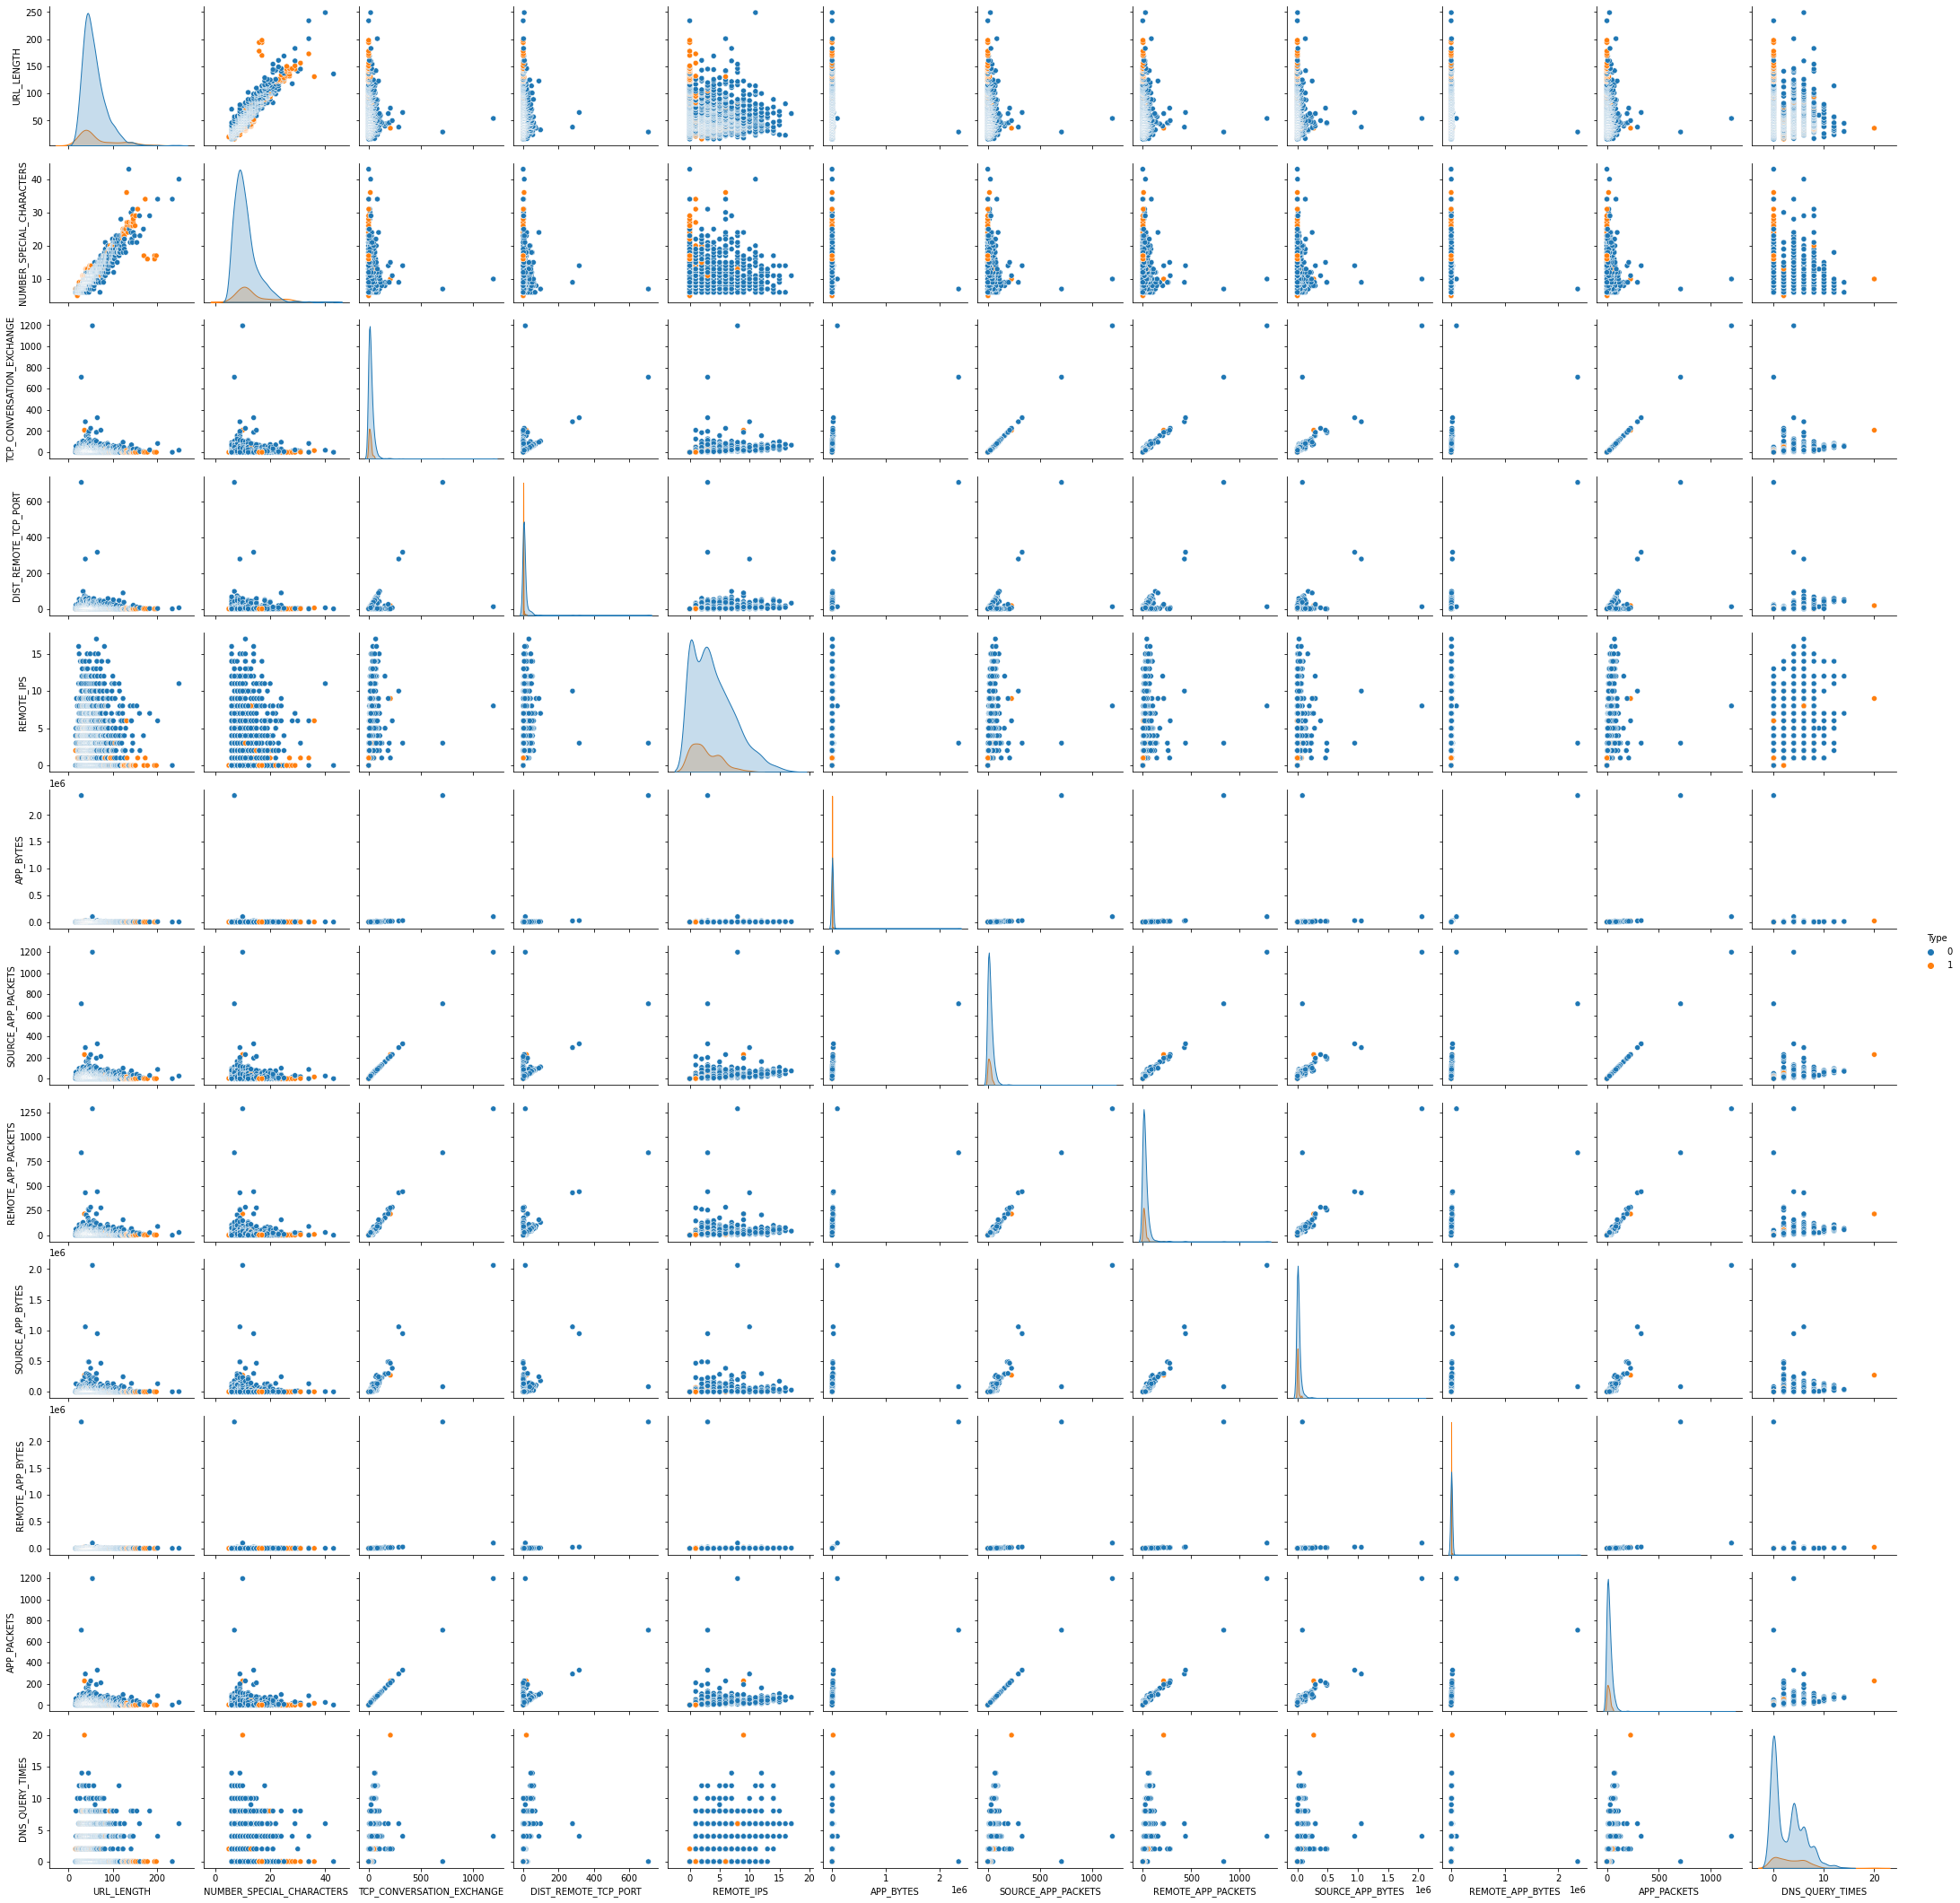

In [17]:
sns.pairplot(df2,hue='Type')


In [18]:
df2['Type']=df2['Type'].apply(lambda x : int(x))

In [19]:
print(np.isfinite(df2).all())
#False:不包含
#True:包含
print(np.isinf(df2).all())


URL_LENGTH                   True
NUMBER_SPECIAL_CHARACTERS    True
TCP_CONVERSATION_EXCHANGE    True
DIST_REMOTE_TCP_PORT         True
REMOTE_IPS                   True
APP_BYTES                    True
SOURCE_APP_PACKETS           True
REMOTE_APP_PACKETS           True
SOURCE_APP_BYTES             True
REMOTE_APP_BYTES             True
APP_PACKETS                  True
DNS_QUERY_TIMES              True
Type                         True
dtype: bool
URL_LENGTH                   False
NUMBER_SPECIAL_CHARACTERS    False
TCP_CONVERSATION_EXCHANGE    False
DIST_REMOTE_TCP_PORT         False
REMOTE_IPS                   False
APP_BYTES                    False
SOURCE_APP_PACKETS           False
REMOTE_APP_PACKETS           False
SOURCE_APP_BYTES             False
REMOTE_APP_BYTES             False
APP_PACKETS                  False
DNS_QUERY_TIMES              False
Type                         False
dtype: bool


In [20]:
x=df2.drop(['Type'],axis=1)
y=df2['Type']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2022)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


x_train shape: (1148, 12)
y_train shape: (1148,)
x_test shape: (287, 12)
y_test shape: (287,)


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr',solver='sag')


# 在训练集上训练逻辑回归模型
model.fit(x_train,y_train)



#打印模型、模型系数、模型截距
print('模型','-'*30,'\n',model)
print('模型系数','-'*30,'\n',model.coef_)
print('模型截距','-'*30,'\n',model.intercept_)

模型 ------------------------------ 
 LogisticRegression(multi_class='ovr', solver='sag')
模型系数 ------------------------------ 
 [[-1.42951793e-06 -2.62082932e-07 -2.38834995e-07 -1.34275984e-07
  -9.35104404e-08 -2.56644288e-05 -2.74149369e-07 -2.54493348e-07
  -7.12472946e-05 -2.83476509e-05 -2.74149369e-07 -3.47773216e-08]]
模型截距 ------------------------------ 
 [-2.55374175e-08]


In [23]:
# 在测试集上利用训练好的模型进行预测
y_predict=model.predict(x_test)



# 由于逻辑回归模型是概率预测模型，所有我们可以利用 predict_proba 函数预测其概率
test_predict_proba=model.predict_proba(x_test)



# 其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率
print('The test predict Probability of each class:\n',test_predict_proba)



The test predict Probability of each class:
 [[5.15084746e-01 4.84915254e-01]
 [9.97667358e-01 2.33264231e-03]
 [6.22432242e-01 3.77567758e-01]
 [9.35963014e-01 6.40369856e-02]
 [7.04892781e-01 2.95107219e-01]
 [5.13871176e-01 4.86128824e-01]
 [6.59007781e-01 3.40992219e-01]
 [5.16896210e-01 4.83103790e-01]
 [8.94571818e-01 1.05428182e-01]
 [9.84314351e-01 1.56856493e-02]
 [5.57725533e-01 4.42274467e-01]
 [5.10193212e-01 4.89806788e-01]
 [5.57300082e-01 4.42699918e-01]
 [9.97836340e-01 2.16366017e-03]
 [5.13065107e-01 4.86934893e-01]
 [9.99918613e-01 8.13873510e-05]
 [5.00032373e-01 4.99967627e-01]
 [5.00027953e-01 4.99972047e-01]
 [5.00041570e-01 4.99958430e-01]
 [5.68326534e-01 4.31673466e-01]
 [5.00021259e-01 4.99978741e-01]
 [5.26962740e-01 4.73037260e-01]
 [5.07017819e-01 4.92982181e-01]
 [6.89702933e-01 3.10297067e-01]
 [9.90008596e-01 9.99140376e-03]
 [5.17214614e-01 4.82785386e-01]
 [5.00014826e-01 4.99985174e-01]
 [5.08070430e-01 4.91929570e-01]
 [5.44726267e-01 4.55273733e-01

In [24]:
y_predict_df=pd.DataFrame(y_predict,columns=['y_predict'],index=y_test.index)
y_test_predict_df=pd.concat([y_test,y_predict_df],axis=1)
print('真实值与预测值','-'*30,'\n',y_test_predict_df)

真实值与预测值 ------------------------------ 
       Type  y_predict
607      0          0
1726     0          0
761      0          0
1470     0          0
400      0          0
...    ...        ...
775      0          0
1192     0          0
1201     0          0
1500     0          0
362      0          0

[287 rows x 2 columns]


In [25]:
print('The accuracy of the Logistic Regression is:',accuracy_score(y_test,y_predict))

The accuracy of the Logistic Regression is: 0.8780487804878049


The confusion matrix result:
 [[252  35]
 [  0   0]]


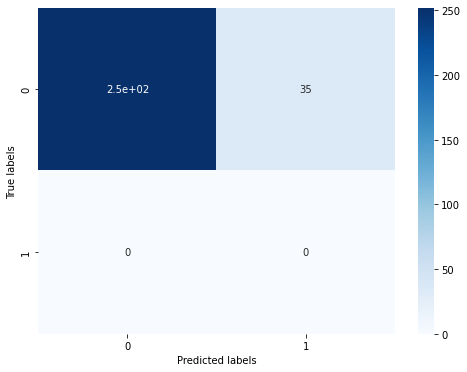

In [26]:
from sklearn import metrics
confusion_matrix_result = metrics.confusion_matrix(y_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)



# 用热力图对混淆矩阵进行可视化
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



In [27]:
from sklearn.metrics import classification_report
target_names=['class 0','class 1']
classifyreport = classification_report(y_test,y_predict,target_names=target_names)
print('分类结果报告\n',classifyreport)



分类结果报告
               precision    recall  f1-score   support

     class 0       0.88      1.00      0.94       252
     class 1       0.00      0.00      0.00        35

    accuracy                           0.88       287
   macro avg       0.44      0.50      0.47       287
weighted avg       0.77      0.88      0.82       287



In [28]:
#优化
parameters={
'penalty':('l1','l2'),
'C': (0.01,0.1, 1, 10)
}
grid_search=GridSearchCV(LogisticRegression(),parameters,verbose=0,scoring='accuracy',cv=5)
grid=grid_search.fit(x_train,y_train)
print('最佳效果: %0.3f'% grid_search.best_score_)
best_parameters=grid_search.best_estimator_.get_params()
print('最佳参数: \n',best_parameters)


最佳效果: 0.884
最佳参数: 
 {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [32]:
x1=[[30,8,28,12,3,3856,24,51,53453,1200,58,5.0]]
y1_predict=model.predict(x1)
test_predict_proba1=model.predict_proba(x1)
print('每种种网站的概率:',test_predict_proba1)
print('网站的类型:',y1_predict)

每种种网站的概率: [[0.98094992 0.01905008]]
网站的类型: [0]


In [33]:
from tkinter import *
from tkinter import messagebox
 
def func():
    y1_predict=model.predict(x1)
    test_predict_proba1=model.predict_proba(x1)
    print('每种种网站的概率:',test_predict_proba1)
    print('网站的类型:',y1_predict)
 
# 创建窗口：实例化一个窗口对象。
root = Tk()
 
# 窗口大小
root.geometry("600x450+374+182")
 
#  窗口标题
root.title("Web_classify")
 
# 添加标签控件
label = Label(root,text="网址特征：",font=("宋体",25),fg="red")
# 定位
label.grid()
 
# 添加输入框
x1= Entry(root,font=("宋体",25),fg="red")
x1.grid(row=0,column=1)
 
# 添加点击按钮
button = Button(root,text="分类",font=("宋体",25),fg="blue",command=func)
button.grid(row=1,column=1)
"""
command=func表示调用最开始定义的func函数。
func函数一定要在这句代码之前，因为这里需要调用这个func函数。
"""
# 显示窗口
root.mainloop()